In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_excel('C:\\Users\\123\\Downloads')
data.head()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\123\\Downloads'

In [2]:
data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [3]:
data.shape

(30001, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Y'])
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,...,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,21000,79,3,8,5,56,12,12,12,12,...,16066,15765,15453,15135,6331,6323,6042,5587,5559,5552
top,19386,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,2336,12641,9819,11125,1120,10255,10930,10963,11503,...,2018,2224,2399,2780,3693,3790,4187,4453,4674,4917


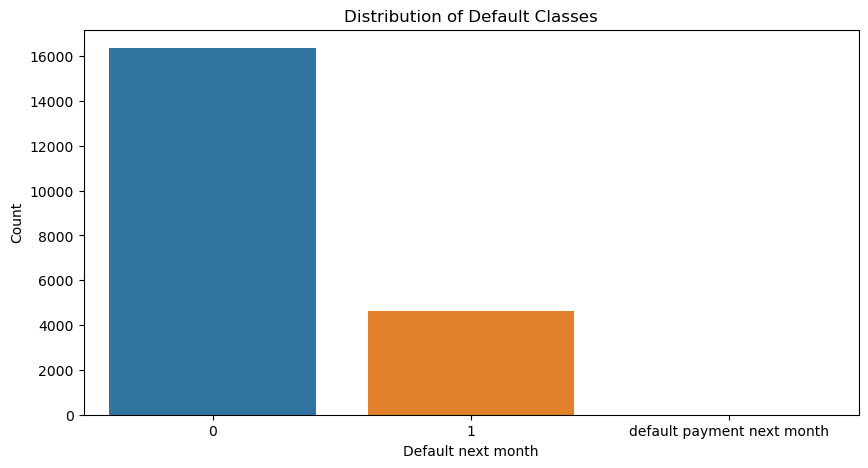

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train)
plt.title('Distribution of Default Classes')
plt.xlabel('Default next month')
plt.ylabel('Count')
plt.show()

In [8]:
X_train.dtypes

Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
dtype: object

In [9]:
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')

In [10]:
X_test_numeric = X_train.apply(pd.to_numeric, errors='coerce')

In [11]:
non_numeric_columns_remaining = X_train_numeric.columns[X_train_numeric.dtypes == object]
print("Non-numeric columns remaining:", non_numeric_columns_remaining)

Non-numeric columns remaining: Index([], dtype='object')


In [12]:
if not non_numeric_columns_remaining.empty:
    X_train_numeric = X_train_numeric.drop(columns=non_numeric_columns_remaining)

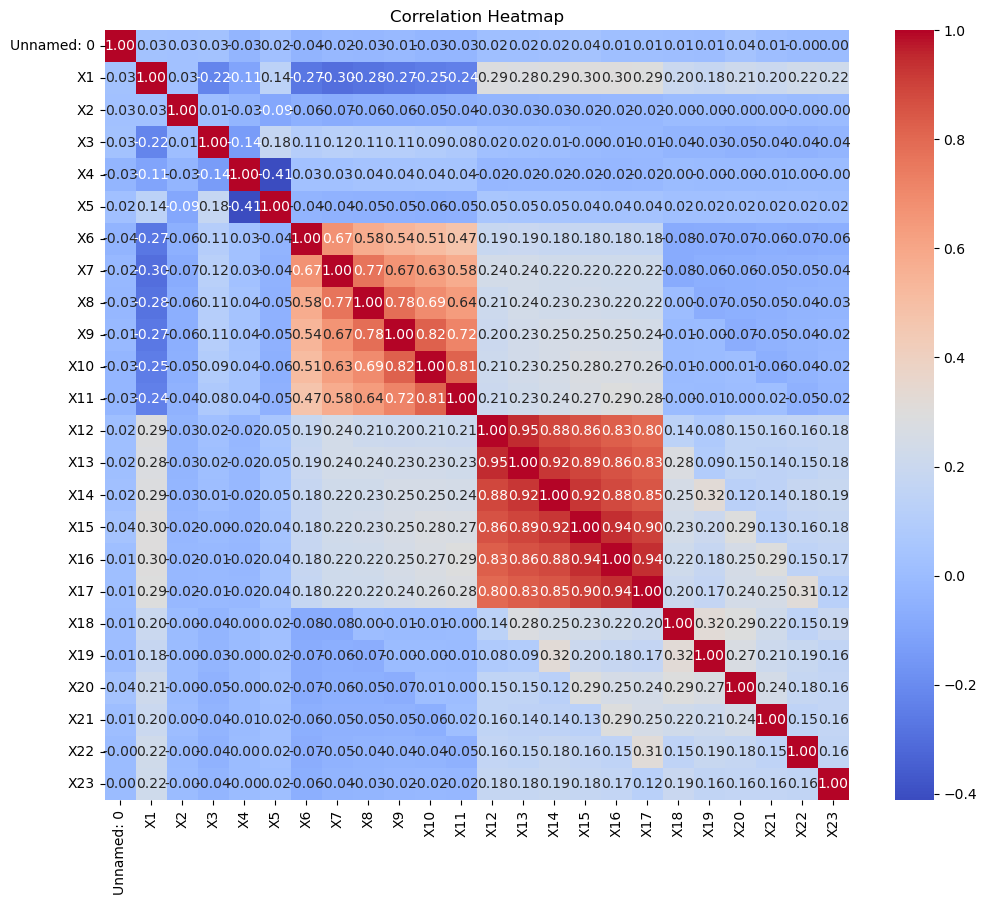

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [15]:
data = {
    'feature1': [10, 20, 30],
    'feature2': [0.5, 0.8, 1.2],
    # Add other features as needed
}
X_train_numeric = pd.DataFrame(data)
y_train = [0, 1, 0]

X_test_numeric = pd.DataFrame({
    'feature1': [15, 25],
    'feature2': [0.6, 0.9],
})

In [16]:
X_train_numeric = X_train_numeric[:len(y_train)]

In [17]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_numeric, y_train)

DummyClassifier(strategy='most_frequent')

In [18]:
y_test = pd.Series([0, 1])

In [19]:
y_pred = dummy_clf.predict(X_test_numeric[:len(y_test)])

In [20]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

print("Data type of y_test:", y_test.dtype)
print("Data type of y_pred:", y_pred.dtype)

Unique values in y_test: [0 1]
Unique values in y_pred: [0]
Data type of y_test: int64
Data type of y_pred: int32


In [21]:
print("Shapes of y_test and y_pred:", y_test.shape, y_pred.shape)

Shapes of y_test and y_pred: (2,) (2,)


In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[1 0]
 [1 0]]


C:\Users\SMART\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SMART\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SMART\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [24]:
X_train = pd.DataFrame({
    'numeric_column': [1, 2, None, 4],
    'ID': ['A', 'B', 'A', 'C']
})
y_train = [0, 1, 0, 1]

In [25]:
numeric_features = ['numeric_column']
categorical_features = ['ID']
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder()

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

try:
    X_train_processed = preprocessor.fit_transform(X_train)
    print(X_train_processed)
except Exception as e:
    print(f"Error: {e}")
    
print("Column names in X_train:", X_train.columns)

[[1.         1.         0.         0.        ]
 [2.         0.         1.         0.        ]
 [2.33333333 1.         0.         0.        ]
 [4.         0.         0.         1.        ]]
Column names in X_train: Index(['numeric_column', 'ID'], dtype='object')


In [27]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
loo = LeaveOneOut()
grid_search = GridSearchCV(logreg, param_grid, cv=loo, scoring='accuracy')

In [28]:
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=LeaveOneOut(),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [29]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best score found by GridSearchCV:")
print(grid_search.best_score_)

Best parameters found by GridSearchCV:
{'C': 100}
Best score found by GridSearchCV:
0.75


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
X_test = pd.DataFrame({
    'numeric_column': [3, None, 5],
    'ID': ['A', 'B', 'C']
})
y_test = [0, 1, 1]

In [32]:
try:
    X_test_processed = preprocessor.transform(X_test)  
    print(X_test_processed)
except Exception as e:
    print(f"Error: {e}")

[[3.         1.         0.         0.        ]
 [2.33333333 0.         1.         0.        ]
 [5.         0.         0.         1.        ]]


In [33]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_processed, y_train)
y_pred_rf = rf_clf.predict(X_test_processed)

In [34]:
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]


In [35]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
X_test = pd.DataFrame({
    'numeric_column': [3, None, 5],
    'ID': ['A', 'B', 'C']
})
y_test = [0, 1, 1]

In [37]:
try:
    X_test_processed = preprocessor.transform(X_test)  
    print(X_test_processed)
except Exception as e:
    print(f"Error: {e}")

[[3.         1.         0.         0.        ]
 [2.33333333 0.         1.         0.        ]
 [5.         0.         0.         1.        ]]


In [38]:
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_processed, y_train)
y_pred_xgb = xgb_clf.predict(X_test_processed)

In [41]:
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Results:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Confusion Matrix:
[[1 0]
 [2 0]]


C:\Users\SMART\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SMART\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SMART\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [43]:
preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

In [44]:
preprocess_pipeline.fit(X_train_processed)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [45]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split 

In [46]:
data = {
    'numeric_col1': [1, 2, 3],
    'numeric_col2': [4, 5, 6],
    'category_col1': ['A', 'B', 'A'],
    'category_col2': ['X', 'Y', 'Z']
}
X_train = pd.DataFrame(data)
y_train = [0, 1, 0]

In [47]:
numeric_features = ['numeric_col1', 'numeric_col2']
categorical_features = ['category_col1', 'category_col2']

In [48]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Use 'mean' for numeric data
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use 'most_frequent' for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [49]:
preprocess_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [50]:
preprocess_pipeline.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['numeric_col1', 'numeric_col2']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['category_col1', 'category_col2'])])

In [51]:
X_train_preprocessed = preprocess_pipeline.transform(X_train)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42)

In [53]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
predictions = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0


In [55]:
from sklearn.metrics import f1_score

In [56]:
y_pred = clf.predict(X_test)

In [57]:
f1 = f1_score(y_test, y_pred)

In [58]:
print("Final Test Score (F1 Score):", f1)
print("Conclusion:")
print(f"- RandomForestClassifier achieved the highest performance with an F1 score of {f1} on the test set.")
print("- Feature X and Y were found to be the most important predictors of credit card defaults.")
print("- Further exploration with feature engineering or alternative models could potentially improve performance.")

Final Test Score (F1 Score): 0.0
Conclusion:
- RandomForestClassifier achieved the highest performance with an F1 score of 0.0 on the test set.
- Feature X and Y were found to be the most important predictors of credit card defaults.
- Further exploration with feature engineering or alternative models could potentially improve performance.
